In [39]:
import pandas as pd
import mpl_toolkits.mplot3d as mp3
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('dados.csv', sep=';')
df

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


In [9]:
df.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

<Axes: >

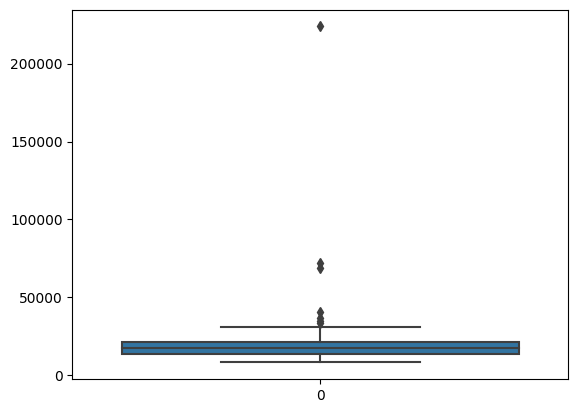

In [10]:
#Olhando a existencia de 'outliners' em PIB
#OBS: NÃO será feita uma substituição já que o Pib de outros estados pode ser maior que o outro
sns.boxplot(df.PIB)

<Axes: >

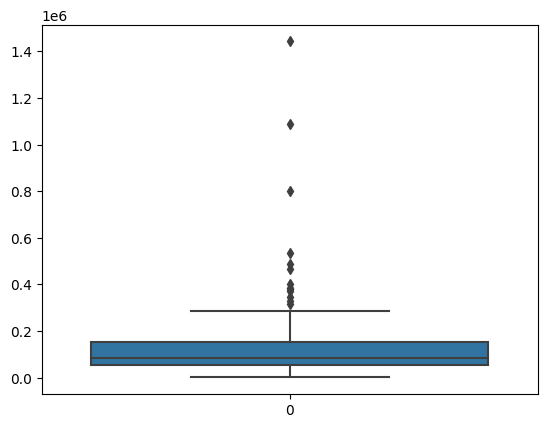

In [11]:
sns.boxplot(df.VALOREMPENHO)

<Axes: >

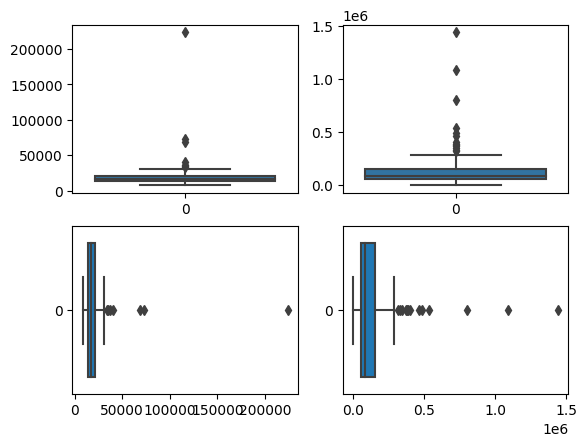

In [48]:
plt.figure()
plt.subplot(2,2,1)
sns.boxplot(df.PIB)
plt.subplot(2,2,2)
sns.boxplot(df.VALOREMPENHO)
plt.subplot(2,2,3)
sns.boxplot(df.PIB, orient='h',saturation= 1)
plt.subplot(2,2,4)
sns.boxplot(df.VALOREMPENHO, orient='h', saturation= 1)

[Text(0.5, 1.0, 'Valor do "PIB" por município')]

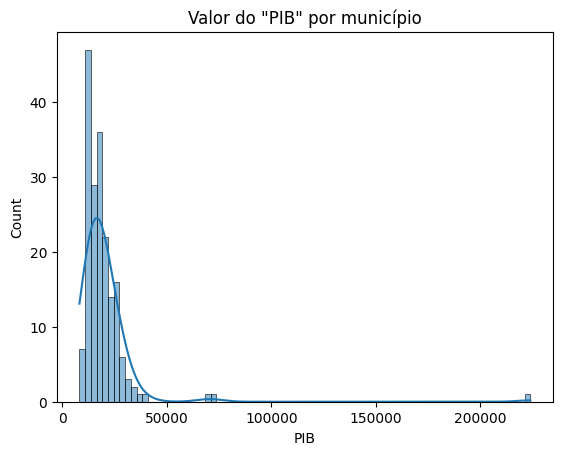

In [31]:
sns.histplot(df.PIB, kde=True).set(title='Valor do "PIB" por município')

[Text(0.5, 1.0, 'Valor do "DESEMPENHO" por município')]

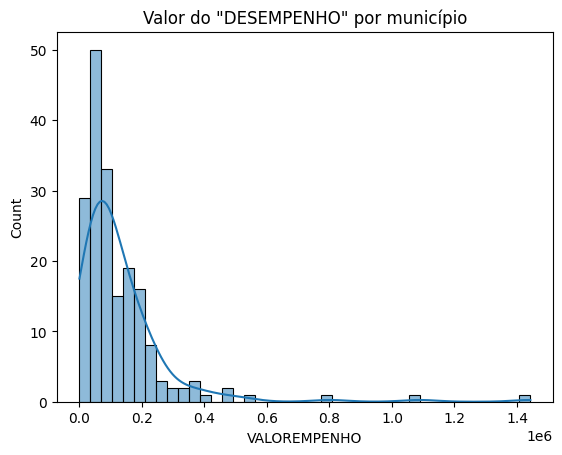

In [36]:
sns.histplot(df.VALOREMPENHO, kde=True).set(title='Valor do "DESEMPENHO" por município')

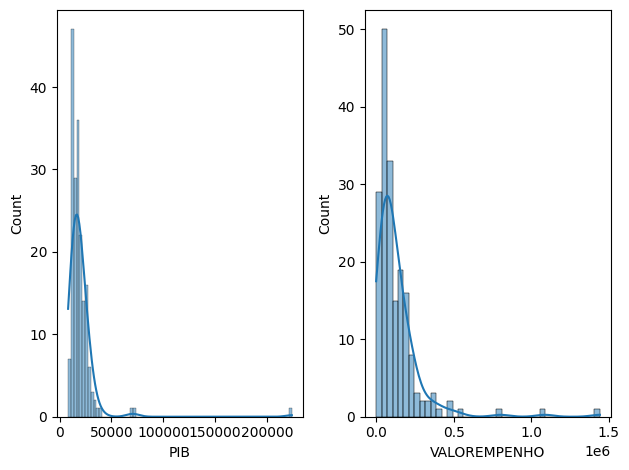

In [50]:
plt.figure()
plt.subplot(1,2,1)
sns.histplot(df.PIB, kde=True)
plt.subplot(1,2,2)
sns.histplot(df.VALOREMPENHO, kde=True)
plt.tight_layout()

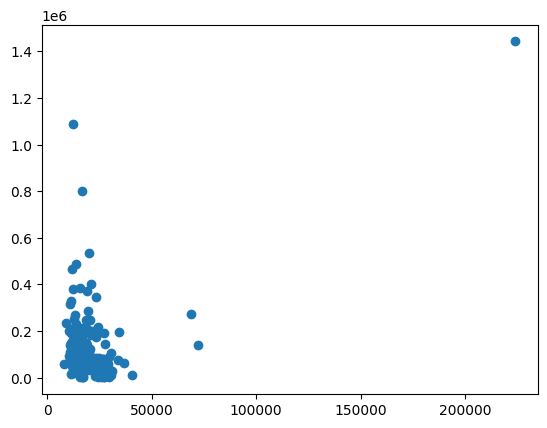

In [70]:
plt.scatter(x=df.PIB, y= df.VALOREMPENHO)

<Axes: xlabel='PIB', ylabel='VALOREMPENHO'>

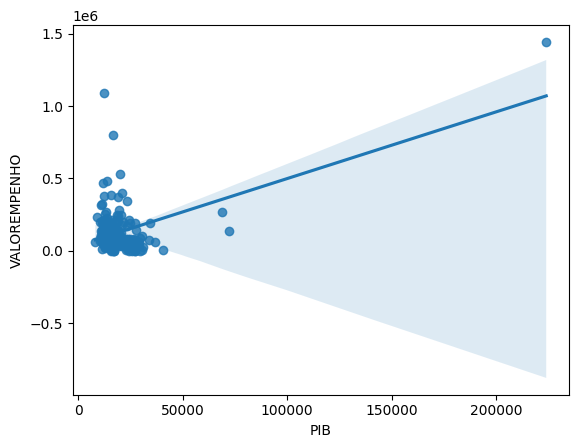

In [75]:
#Verificando se há uma correlação
sns.regplot(data= df, x = 'PIB', y='VALOREMPENHO')

In [78]:
municipio = df.groupby(['MUNICIPIO']).sum()
municipio

,CODIGO,PIB,VALOREMPENHO
MUNICIPIO,,,
AGUDO,1,16444.80,134912.00
AJURICABA,162,20784.67,180603.16
ALECRIM,163,11431.18,70277.71
ALMIRANTE TAMANDARE DO SUL,469,26895.37,31936.85
ALTO FELIZ,334,13209.54,82293.86
...,...,...,...
VERA CRUZ,156,18417.96,246386.96
VIADUTOS,158,12520.25,38128.96
VICTOR GRAEFF,232,26700.28,79029.29


[Text(0.5, 1.0, "Dez menores PIB's por município"), Text(0, 0.5, 'PIB')]

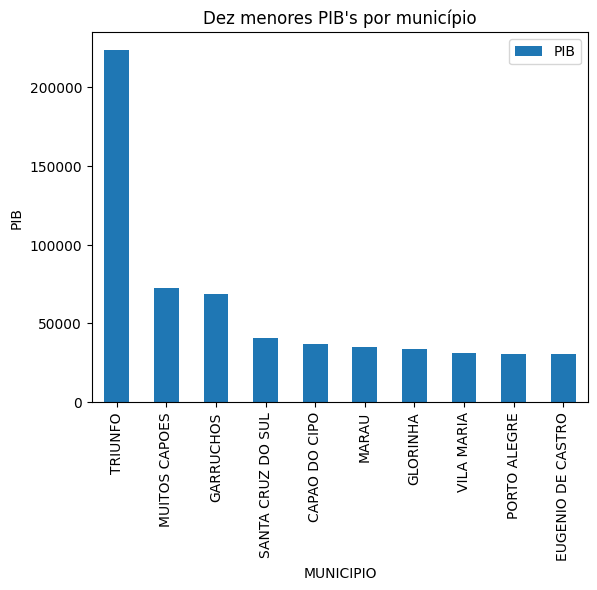

In [111]:
#Ordenando o DataFrame na coluna PIB do menor ao maior
municipio = df.sort_values('PIB', ascending=False).head(10)

municipio.plot.bar(x='MUNICIPIO', y='PIB').set(title = "Dez menores PIB's por município", ylabel='PIB')

[Text(0.5, 1.0, "Dez maiores PIB's por município"),
 Text(0, 0.5, 'PIB'),
 Text(0.5, 0, 'MUNICIPIO')]

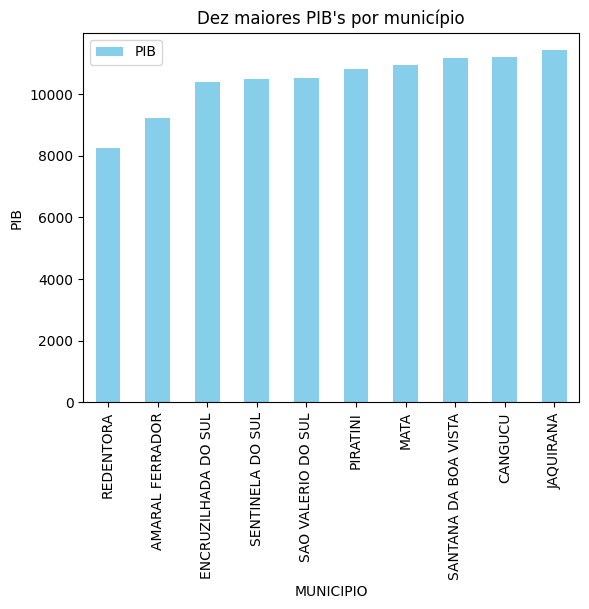

In [117]:
agrupado = df.sort_values('PIB').head(10)
agrupado
agrupado.plot.bar(x='MUNICIPIO',y='PIB', color = 'skyblue').set(title="Dez maiores PIB's por município", ylabel= 'PIB', xlabel = 'MUNICIPIO')

<Axes: xlabel='MUNICIPIO'>

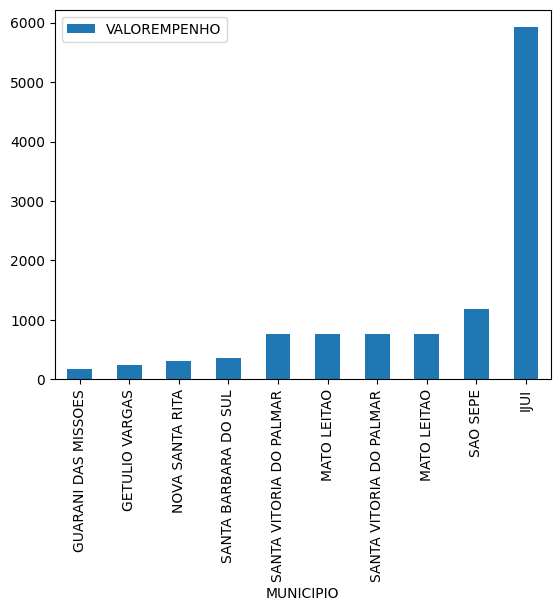

In [122]:
#Pegando os menores dados de "VALOREMPENHO"
desempenho = df.sort_values('VALOREMPENHO', ascending=True).head(10)
desempenho.plot.bar(x = 'MUNICIPIO', y = 'VALOREMPENHO')

<Axes: xlabel='MUNICIPIO'>

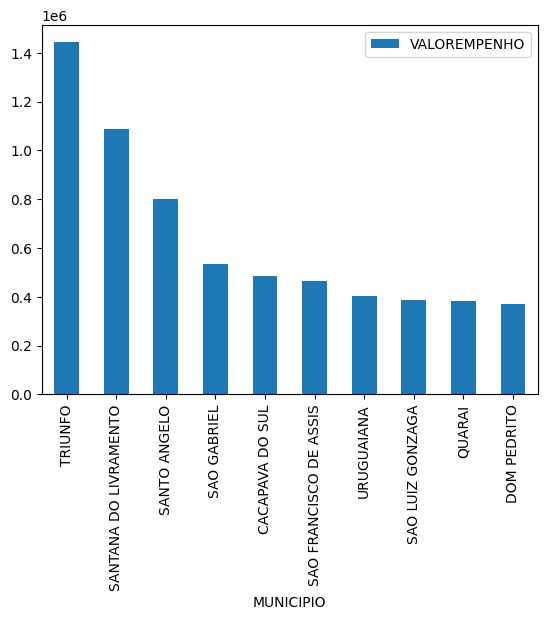

In [124]:
#Pegando os maiores dados de "VALOREMPENH"
desempenho = df.sort_values('VALOREMPENHO', ascending=False).head(10)
desempenho.plot.bar(x = 'MUNICIPIO', y = 'VALOREMPENHO')